# KMeans with SciKit-Learn

Machine Learning with scikit-learn is easy. All the algorithms and helper functions that you might need are included as part of it. You'll still need to gather and clean your data. You'll need to know what algorithm to use and how to tune it for the specific problem that you are working on.

### References: ###
* [K-Means Clustering Explained by Soner Yildirim](https://towardsdatascience.com/k-means-clustering-explained-4528df86a120)
* [Understanding Boxplots by Michael Galarnyk](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
* [How to Use StandardScaler and MinMaxScaler Transforms in Python by Jason Brownlee](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

## Old Faithful ##

We'll continue to use the very simple, 2-D dataset from Old Faithful Geyser in Yellowstone

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the same Old Faithful Geyser data that we used before
df = pd.read_csv('old_faithful_geyser_eruption_time.csv')
print(len(df))
df.head()

In [ ]:
# Let's filter out the unused data and rename the columns
df.rename(columns={"Eruption time":"Eruption", "Waiting time":"Waiting"}, inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

## Data Cleaning ##

Verify the quality of the data by looking for missing fields.

In [ ]:
# What type of data do we have? Numerical data is the easiest to spot errors
df.dtypes

In [ ]:
# It's numerical data, see if we're missing any fields
null_df = df.isnull()
null_df.head()

In [ ]:
# Let's count the number of nulls per row
null_count = null_df.sum(axis=1)
null_count.head()

In [ ]:
# Can't see all 272 rows, so put the worst offenders on top
null_count.sort_values(ascending=False)

In [ ]:
# One liner to show the top-10 rows that are worst offenders
df.isnull().sum(axis=1).sort_values(ascending=False)[:10]

## Build the Model ##

All sklearn models are pretty much built the same way:
* Define a ML model - choose an algorithm and set any algorithm-specific options
* Train the model - usually with the `fit` function
* Test the model - make sure it is accurate enough (not shown here: only for ***supervised*** algorithms)
* Make predictions - usually with the `predict` function

In [ ]:
from sklearn.cluster import KMeans

# Define the model: K-Means with 2 clusters
km = KMeans(n_clusters=2, n_init='auto', max_iter=10)

# Fit the model to the data: runs K-Mean to find centroids
# note: the variable name "cluster_centers_" has been slightly different with older versions of sklearn
km.fit(df[['Eruption', 'Waiting']])
centroids = km.cluster_centers_

# Assign "new" samples to each centroid; for data-mining, we often just use the original data
df['Clusters'] = km.predict(df[['Eruption', 'Waiting']])

In [ ]:
# Let's look at the output
print(centroids)
print()
df.head()

## Visualize the Results ##

Clustering algorithms are unique because we don't have labeled data to test against. Since this is a 2-D problem, we can just look at a plot and see if "looks" right. There are more sophisiticated measurements that allow us to quantify the accuracy. These are important for problems of higher dimension. We aren't going to worry about them for now... just plot the thing.

In [ ]:
# We must map cluster labels to colors
colors = ("royalblue", "orangered")

# Plot the clusters and centroids
plt.figure(figsize=(6,6))
plt.scatter(df['Eruption'], df['Waiting'], c=[colors[clus_id] for clus_id in df['Clusters']])
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="+", c='black')
plt.plot()

## Problems ##

Oh-snap! It looks as though our KMeans has made an error. The funny thing is that your custom implementation is going to make the same "mistake" as the scikit-learn model.

* Look closely at the far-left blue point. It sure looks a lot closer to the orange centroid that it does to the blue centroid.
* Now look closely at the far-right orange point. It looks to be closer to the blue centroid than to the orange centroid.

Why are these two samples mislabeled? Are there other points that are mislabled, just not to such an extreme? And why did we have to bring politics into a machine learning discussion?

*By the way, there are actually six samples that have been clustered incorrectly.*

The problem is that the two variables are using different scales. The eruption time is relatively small (<10) and the waiting time is relatively large (40-100). Variable with higher ranges have more influence on the overall outcome than variables with lower ranges. It's just an artifact of the way we calculate distance.

In [ ]:
# Seaborn is a plotting library on top of matplotlib
# It has fancier graphs and a different visual style
import seaborn as sns
sns.boxplot(x=df['Eruption'])
plt.show()

In [ ]:
# Boxplots show the median value, Q1 and Q3 of the Interquartile Range (IRQ), and any outliers.
# Outliers are defined as being less than Q1-1.5*IQR or being more than Q3+1.5*IQR.
# There are no outliers shown in either of these two boxplots.
sns.boxplot(x=df['Waiting'])
plt.show()

## Normalization ##

We can mitigate this problem by scaling all variables to use the same range, between 0 and 1. After scaling, the distribution of datapoints will not change even though their literal values will be different. If done correctly, this will give each variable an equal weight without changing any of the statistical properties of the dataset.

There are several techniques to scale data. We will learn about one of the most common method, Normalization, today. Another  technique is called Standardization, but it is for another time.

Normalize each sample by subtracting the minimum value in the dataset. This will cause the minimum stample to take on the new value of zero. Then divide each sample by the dataset's range. The division will scale each sample properly and the maximum sample will take on a value of one.

$$x'=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Here's the same result using sklearn
scaler = MinMaxScaler()
df[['Waiting', 'Eruption']] = scaler.fit_transform(df[['Waiting', 'Eruption']])
df.head()

In [ ]:
ax1 = sns.boxplot(x=df['Eruption'])
plt.show()

In [ ]:
sns.boxplot(x=df['Waiting'])
plt.show()

## Exercise ##

Your task is to use SKLearn to recreate the KMeans model using ***normalized*** data. If programmed correctly, you'll see that all six of the mislabeled datapoints clustered correctly. 

### KMeans with Normalized Data ###

We'll draw the original model next to the normalized model. This allows us to evaluate the two models side-by-side. The left diagram should use raw data and the right diagram should use normalized data. The left diagram is already finished.

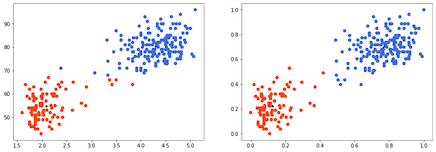

In [ ]:
# Read and preprocess the data
df = pd.read_csv('old_faithful_geyser_eruption_time.csv')
df.rename(columns={"Eruption time":"Eruption", "Waiting time":"Waiting"}, inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)

# Create a graph with two separate plots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(15,5))
colors0 = ("royalblue", "orangered") # for ax[0]
colors1 = colors0[::-1]              # for ax[1]

# TODO: Run KMeans on the original data and plot it to ax[0]


# TODO: Run KMeans using normalized data and plot it on ax[1]


# Show the graph
plt.show()